In [11]:
import os
import pandas as pd
from ydata_profiling import ProfileReport  # Updated import

# Print the current working directory
print("Current working directory:", os.getcwd())

# Optionally, change to a directory where you have write permission
# Replace the path below with a writable directory on your system
os.chdir("/Users/yashsoni/Documents")

# Load the red wine dataset (update the path if necessary)
df = pd.read_csv("/Users/yashsoni/Documents/red_wine.csv")

# Create the profiling report with explorative analysis
profile = ProfileReport(df, title="Red Wine Dataset Profiling Report", explorative=True)

# Save the report to an HTML file in the current (writable) directory
profile.to_file("red_wine_profile.html")

Current working directory: /


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 431.60it/s]


Red Wine Data Columns: Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')
10-Fold Cross-Validation Performance on red_wine.csv:
Baseline: Accuracy = 0.529, AUC = 0.500
Logistic Regression: Accuracy = 0.785, AUC = 0.880
Naive Bayes: Accuracy = 0.822, AUC = 0.895
Decision Tree: Accuracy = 0.752, AUC = 0.750
SVM-Linear: Accuracy = 0.794, AUC = 0.881
SVM-RBF: Accuracy = 0.536, AUC = 0.869
Random Forest: Accuracy = 0.801, AUC = 0.899


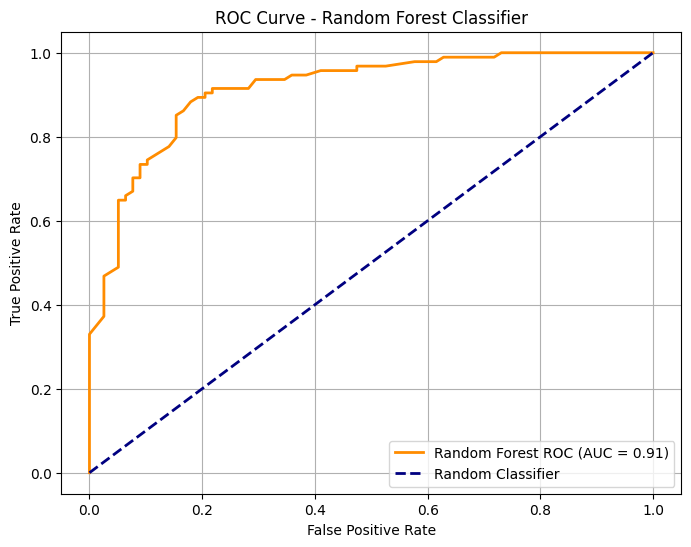

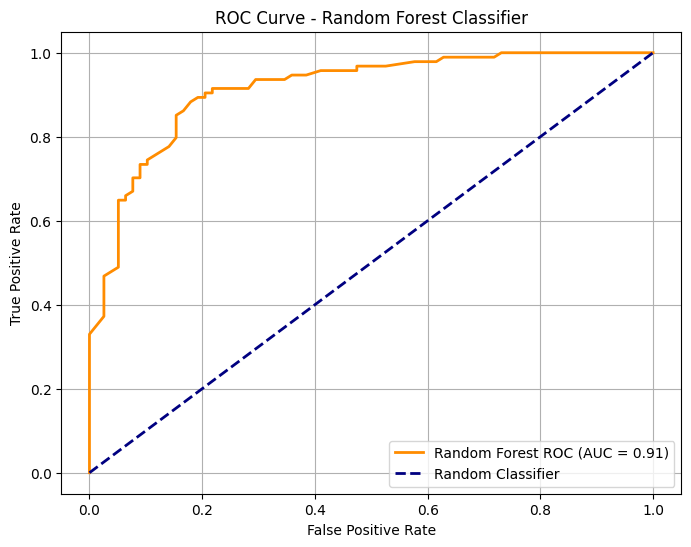

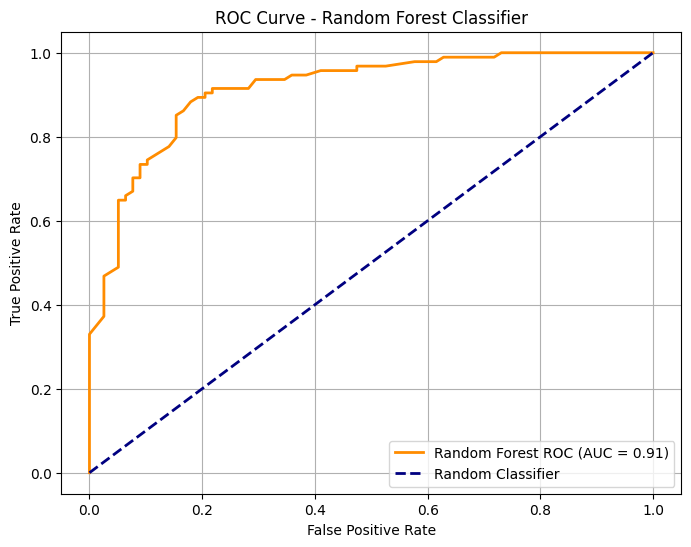

White Wine Data Columns: Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')

AUC on white_wine.csv using Random Forest: 0.974

Interpretability Discussion:
If all models have comparable performance, interpretable models such as Logistic Regression, Decision Trees, or Naive Bayes are preferred.
Logistic Regression offers insights via its coefficients, and Decision Trees provide a clear visual structure of decision rules.
Such models allow wine-tasting experts to understand which organoleptic characteristics (e.g., citric acid, sulphates, alcohol) most influence the quality prediction.


In [16]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn imports for model evaluation and classifiers
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#############################################
# Task 2: 10-Fold Cross-Validation on red_wine.csv
#############################################

# Load the red wine dataset (adjust the file path as needed)
red_df = pd.read_csv("/Users/yashsoni/Documents/red_wine.csv")
print("Red Wine Data Columns:", red_df.columns)

# Assuming the target column is 'type' with values 'low' and 'high'
# Map them to binary: 0 for low, 1 for high
red_df['type'] = red_df['type'].map({'low': 0, 'high': 1})

# Separate features and target
X_red = red_df.drop('type', axis=1)
y_red = red_df['type']

# Define models to evaluate
models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),  # Predicts the majority class
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM-Linear": SVC(kernel='linear', probability=True, random_state=42),
    "SVM-RBF": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Set up scoring metrics: accuracy and ROC AUC
scoring = ['accuracy', 'roc_auc']
results = {}

# Perform 10-fold cross-validation for each model
for name, model in models.items():
    cv_results = cross_validate(model, X_red, y_red, cv=10, scoring=scoring)
    results[name] = {
        "Accuracy": np.mean(cv_results['test_accuracy']),
        "AUC": np.mean(cv_results['test_roc_auc'])
    }

# Override baseline AUC to 0.5 per assignment instructions (random classifier AUC)
results["Baseline"]["AUC"] = 0.5

# Display the cross-validation results
print("10-Fold Cross-Validation Performance on red_wine.csv:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.3f}, AUC = {metrics['AUC']:.3f}")

#############################################
# Task 3: Plot ROC Curve for Random Forest Classifier
#############################################

# Split the red wine dataset into training and testing sets for ROC curve plotting
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, test_size=0.3, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class on the test set
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, color='darkorange', label=f'Random Forest ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='navy', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#############################################
# Task 4: Evaluate Best Model on white_wine.csv
#############################################

# Load the white wine dataset (adjust the file path as needed)
white_df = pd.read_csv("/Users/yashsoni/Documents/white_wine.csv")
print("White Wine Data Columns:", white_df.columns)

# Preprocess white wine dataset: assuming same structure, map target column 'type'
white_df['type'] = white_df['type'].map({'low': 0, 'high': 1})
X_white = white_df.drop('type', axis=1)
y_white = white_df['type']

# For demonstration, we use the Random Forest classifier as the best model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_red, y_red)  # Fit on all red wine data
y_white_probs = best_model.predict_proba(X_white)[:, 1]
white_auc = roc_auc_score(y_white, y_white_probs)
print(f"\nAUC on white_wine.csv using Random Forest: {white_auc:.3f}")

#############################################
# Task 5: Interpretability Discussion
#############################################

print("\nInterpretability Discussion:")
print("If all models have comparable performance, interpretable models such as Logistic Regression, Decision Trees, or Naive Bayes are preferred.")
print("Logistic Regression offers insights via its coefficients, and Decision Trees provide a clear visual structure of decision rules.")
print("Such models allow wine-tasting experts to understand which organoleptic characteristics (e.g., citric acid, sulphates, alcohol) most influence the quality prediction.")